<a href="https://colab.research.google.com/github/AmiraliEsi83/The-CIFAR-10-dataset/blob/main/Howtoreadimagefromfile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import os
from datasets import load_dataset

## Dataset Card for tiny-imagenet
### *Dataset Summary*
Tiny ImageNet contains 100000 images of 200 classes (500 for each class) downsized to 64×64 colored images. Each class has 500 training images, 50 validation images, and 50 test images.

In [4]:
image_net_data = []
def load_imageNet_dataset():
    global image_net_data
    image_net_data = load_dataset('Maysee/tiny-imagenet', split='train')
 


load_imageNet_dataset()
print(type(image_net_data))

print(image_net_data[0])




<class 'datasets.arrow_dataset.Dataset'>
{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=64x64 at 0x7F3CDD5F0F70>, 'label': 0}


In [5]:
print(image_net_data[0]['image'])
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

%matplotlib inline
# imshow(np.asarray(image_net_data[0]['image']))
np.asarray(image_net_data[0]['image'])

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=64x64 at 0x7F3CDCCFF610>


array([[[255, 137, 192],
        [255, 139, 192],
        [246, 148, 197],
        ...,
        [208, 237, 235],
        [207, 241, 240],
        [125, 164, 161]],

       [[255, 124, 189],
        [255, 128, 189],
        [246, 137, 194],
        ...,
        [203, 232, 230],
        [200, 235, 231],
        [121, 160, 157]],

       [[255, 124, 201],
        [255, 127, 201],
        [255, 134, 203],
        ...,
        [207, 233, 230],
        [200, 235, 229],
        [119, 156, 149]],

       ...,

       [[ 94, 122,  71],
        [ 93, 119,  71],
        [ 93, 116,  70],
        ...,
        [ 85,  74,  56],
        [ 78,  67,  49],
        [ 94,  83,  65]],

       [[ 89, 118,  64],
        [ 88, 116,  65],
        [ 87, 113,  66],
        ...,
        [ 86,  75,  57],
        [ 77,  66,  48],
        [ 87,  76,  58]],

       [[ 91, 120,  66],
        [ 91, 119,  68],
        [ 91, 117,  70],
        ...,
        [ 96,  85,  67],
        [ 77,  66,  48],
        [ 72,  61,  43]]

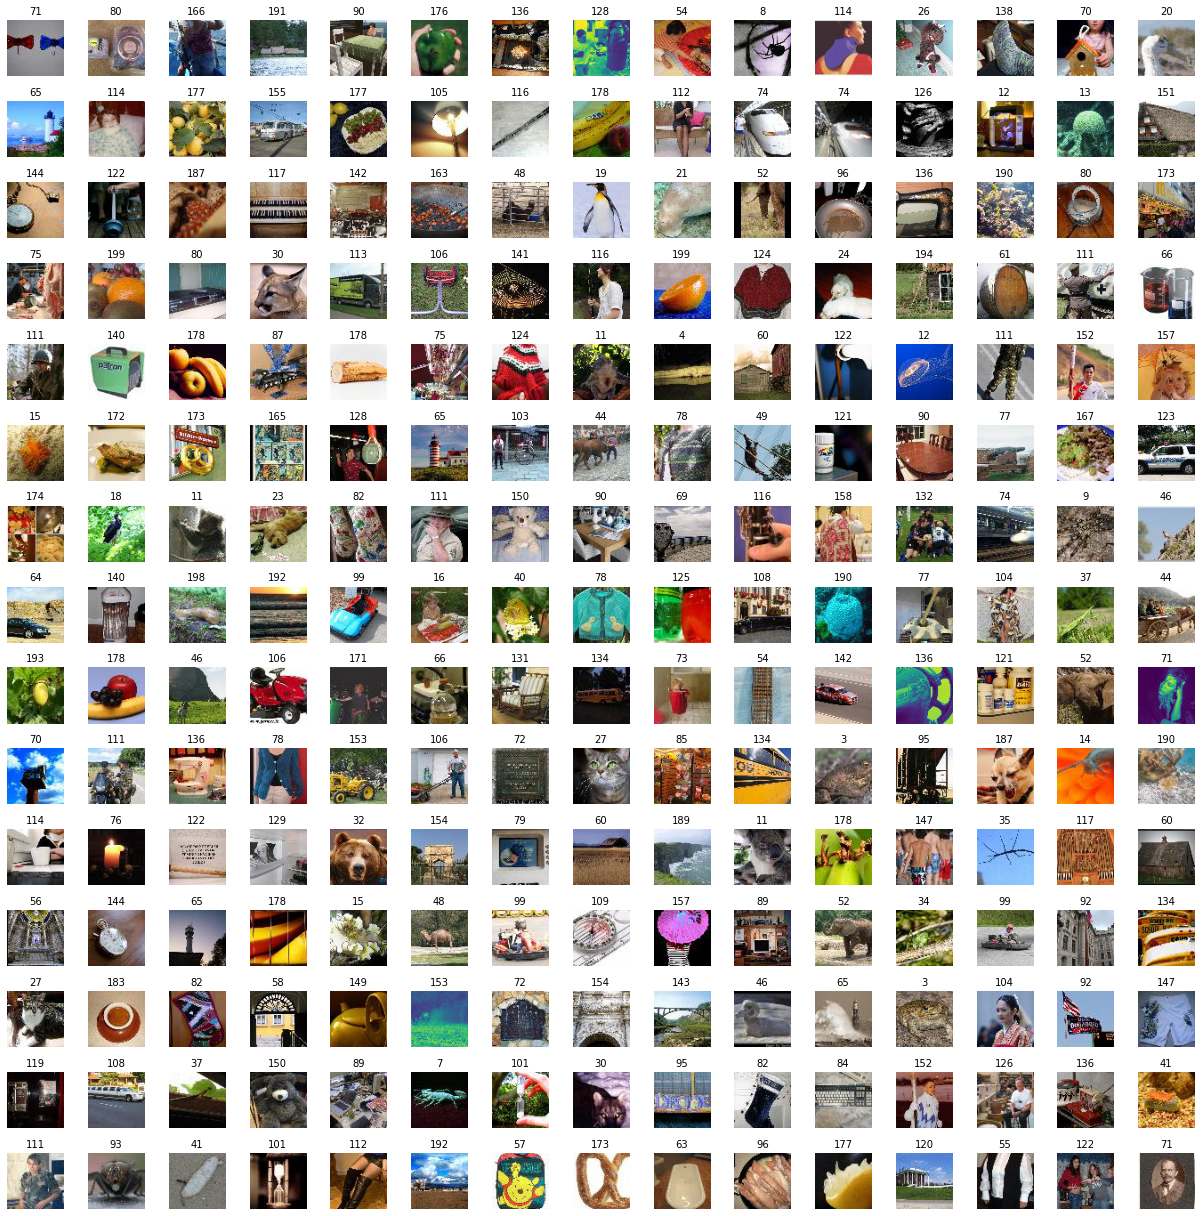

In [6]:
import matplotlib.pylab as plt
w_grid = 15
l_grid = 15

fig, axes = plt.subplots(w_grid,l_grid, figsize=(17,17))
axes = axes.ravel()
n_training = len(image_net_data)
for i in np.arange(0, w_grid * l_grid):
  index = np.random.randint(0, n_training)
 
  axes[i].imshow(np.asarray(image_net_data[index]['image']))
  axes[i].set_title(image_net_data[index]['label'], fontsize=10)
  axes[i].axis('off')
fig.tight_layout()

In [7]:
data = []
for i in range(len(image_net_data)):
  image = np.asarray(image_net_data[0]['image'])
  
  data.append(image)

In [8]:
len(data)

100000

In [9]:
data[0].shape

(64, 64, 3)

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
import classes

In [12]:
classes.i2d

{'n00001740': 'entity',
 'n00001930': 'physical entity',
 'n00002137': 'abstraction, abstract entity',
 'n00002452': 'thing',
 'n00002684': 'object, physical object',
 'n00003553': 'whole, unit',
 'n00003993': 'congener',
 'n00004258': 'living thing, animate thing',
 'n00004475': 'organism, being',
 'n00005787': 'benthos',
 'n00005930': 'dwarf',
 'n00006024': 'heterotroph',
 'n00006150': 'parent',
 'n00006269': 'life',
 'n00006400': 'biont',
 'n00006484': 'cell',
 'n00007347': 'causal agent, cause, causal agency',
 'n00007846': 'person, individual, someone, somebody, mortal, soul',
 'n00015388': 'animal, animate being, beast, brute, creature, fauna',
 'n00017222': 'plant, flora, plant life',
 'n00019046': 'native',
 'n00019128': 'natural object',
 'n00019613': 'substance',
 'n00020090': 'substance',
 'n00020827': 'matter',
 'n00021265': 'food, nutrient',
 'n00021734': 'nutrient',
 'n00021939': 'artifact, artefact',
 'n00022903': 'article',
 'n00023100': 'psychological feature',
 'n0002

In [13]:
print(len(classes.i2d))

82115


In [14]:
labels = [[i] * 500 for i in range(200)]
labels = np.array(labels)
labels = labels.ravel()
len(labels)
     

100000

In [15]:
labels.shape

(100000,)

In [16]:
labels[1000]

2

In [17]:
X = np.array(data)
type(X)

numpy.ndarray

In [18]:
Y=np.array(labels)
type(Y)

numpy.ndarray

In [19]:
print(X.shape)
print(Y.shape)

(100000, 64, 64, 3)
(100000,)


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 2)
X_train[0].shape

(64, 64, 3)

In [ ]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [ ]:
X_train_scaled[0].shape

In [ ]:
from tensorflow import keras



In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(720, 1200, 3)),
    keras.layers.Dense(1, activation='sigmoid', kernel_initializer = 'ones', bias_initializer = 'zeros')
])

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
model.fit(X_train, Y_train, epochs = 10)

In [ ]:
model.evaluate(X_test,Y_test)

In [ ]:
model.predict(X_test)

In [ ]:
coef, intercept = model.get_weights()
coef

In [ ]:
img = cv2.imread('/content/sample_data/images/img.jpeg')
cv2_imshow(img)

In [ ]:
my_image_to_array = np.array(img)

In [ ]:
my_image_to_array.shape

In [ ]:
my_image_to_array = my_image_to_array/255

In [ ]:
my_image_to_array.shape

In [ ]:
my_image_to_array.reshape(1,720,1200,3)

In [ ]:
my_image_to_array.shape

In [ ]:
my_image_to_array = np.expand_dims(my_image_to_array, axis=0)
my_image_to_array.shape

In [ ]:
our_prediction = model.predict(my_image_to_array)

In [ ]:
our_prediction